In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import glob
import tensorflow as tf
import tensorflow.keras.layers as tfl

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Let's Displaying Sample of images and masks

In [4]:
def display_images(data, num_of_plots):
    
    # Load the images from the files
    images = glob.glob('/kaggle/input/lyft-udacity-challenge/'+data+'/'+data+'/CameraRGB/*.png')[:num_of_plots]
    masks = glob.glob('/kaggle/input/lyft-udacity-challenge/'+data+'/'+data+'/CameraSeg/*.png')[:num_of_plots]

    for i in range(len(images)):
        # read image
        images[i] = cv2.imread(images[i])
        # read mask
        masks[i] = cv2.imread(masks[i],cv2.IMREAD_GRAYSCALE)
    # set sub_plot
    fig, axes = plt.subplots(num_of_plots, 2)

    for i in range(len(images)):
        axes[i][0].imshow(images[i])
        axes[i][1].imshow(masks[i])

    # Show the plot
    plt.show()

#### visualize a sample of data from dataA Folder

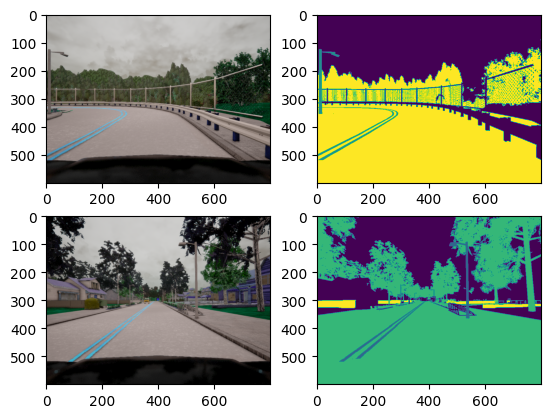

In [5]:
display_images('dataA', 2)

#### visualize a sample of data from dataB Folder

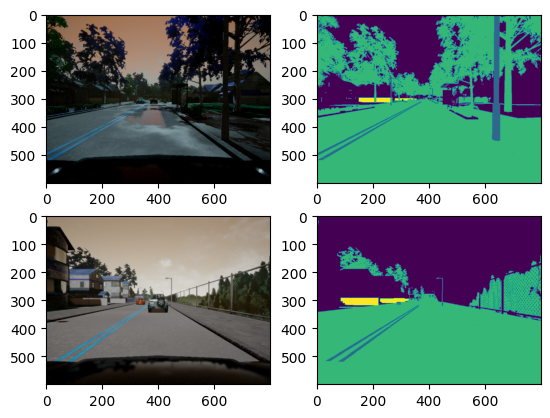

In [6]:
display_images('dataB', 2)

#### visualize a sample of data from dataC Folder

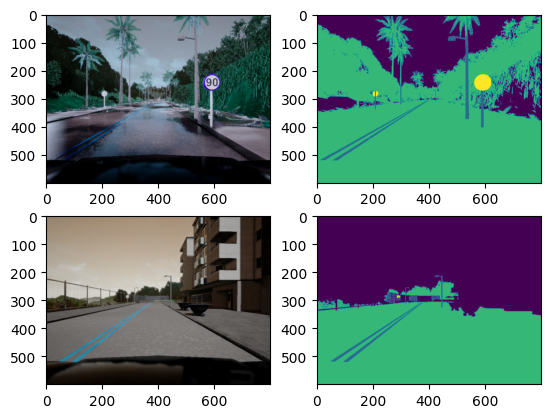

In [7]:
display_images('dataC', 2)

#### visualize a sample of data from dataD Folder

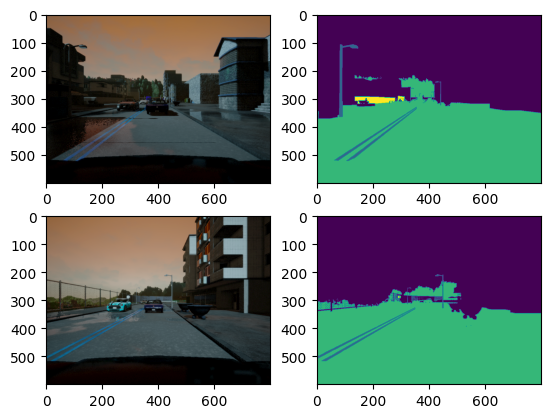

In [8]:
display_images('dataD', 2)

#### visualize a sample of data from dataE Folder

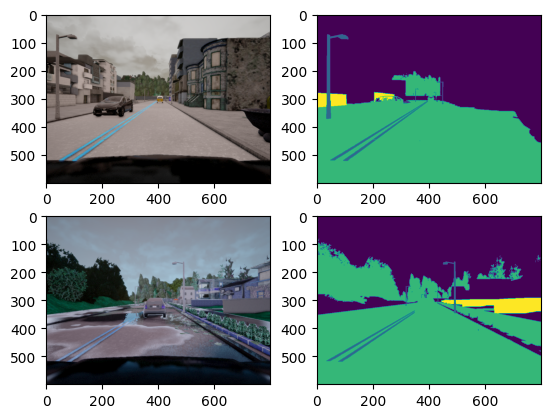

In [9]:
display_images('dataE', 2)

# Let's Store images in list and masks in list

In [10]:
images_list = []
masks_list = []

def store_imgs_masks(data):
    images_list.append(glob.glob('/kaggle/input/lyft-udacity-challenge/'+data+'/'+data+'/CameraRGB/*.png'))
    masks_list.append(glob.glob('/kaggle/input/lyft-udacity-challenge/'+data+'/'+data+'/CameraSeg/*.png'))

#### let's apply store_imgs_masks Func on the Folders (dataA - dataB - dataC - dataD - dataE)

which contain sets of RGB and the corresponding semantic segments inside each one of these folders

In [11]:
store_imgs_masks('dataA')
store_imgs_masks('dataB')
store_imgs_masks('dataC')
store_imgs_masks('dataD')
store_imgs_masks('dataE')

In [12]:
# Viewing a sample of the lists that we created
print(images_list[0][:5])
print("------------------------------------------------------------")
print(masks_list[0][:5])

['/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraRGB/F6-50.png', '/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraRGB/F2-90.png', '/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraRGB/02_00_161.png', '/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraRGB/02_00_090.png', '/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraRGB/02_00_040.png']
------------------------------------------------------------
['/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraSeg/F6-50.png', '/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraSeg/F2-90.png', '/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraSeg/02_00_161.png', '/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraSeg/02_00_090.png', '/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraSeg/02_00_040.png']


In [13]:
# As we see we need to make them in one list 
print(images_list[0][:1], '\n')
print(images_list[1][:1], '\n')
print(images_list[2][:1], '\n')
print(images_list[3][:1], '\n')
print(images_list[4][:1], '\n')

['/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraRGB/F6-50.png'] 

['/kaggle/input/lyft-udacity-challenge/dataB/dataB/CameraRGB/06_00_062.png'] 

['/kaggle/input/lyft-udacity-challenge/dataC/dataC/CameraRGB/F69-95.png'] 

['/kaggle/input/lyft-udacity-challenge/dataD/dataD/CameraRGB/05_00_247.png'] 

['/kaggle/input/lyft-udacity-challenge/dataE/dataE/CameraRGB/F67-59.png'] 



In [14]:
# As we see we need to make them in one list 
print(masks_list[0][:1], '\n')
print(masks_list[1][:1], '\n')
print(masks_list[2][:1], '\n')
print(masks_list[3][:1], '\n')
print(masks_list[4][:1], '\n')

['/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraSeg/F6-50.png'] 

['/kaggle/input/lyft-udacity-challenge/dataB/dataB/CameraSeg/06_00_062.png'] 

['/kaggle/input/lyft-udacity-challenge/dataC/dataC/CameraSeg/F69-95.png'] 

['/kaggle/input/lyft-udacity-challenge/dataD/dataD/CameraSeg/05_00_247.png'] 

['/kaggle/input/lyft-udacity-challenge/dataE/dataE/CameraSeg/F67-59.png'] 



# Transforming the list of lists of images and masks into one list for images and one for masks

In [15]:
# Here we will append each list of images and masks into one list
def get_one_list(list_of_lists):
    
    one_list = []

    for sublist in list_of_lists:
        one_list.extend(sublist)
    return one_list

In [16]:
images_list = get_one_list(images_list)
masks_list = get_one_list(masks_list)

In [17]:
# let's Viewing a Sample of images_list
images_list[60]

'/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraRGB/03_00_101.png'

In [18]:
# let's Viewing a Sample of masks_list
masks_list[60]

'/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraSeg/03_00_101.png'

# Converting images_list and masks_list to Tensors

In [19]:
image_list_tf = tf.data.Dataset.list_files(images_list, shuffle=False)
mask_list_tf = tf.data.Dataset.list_files(masks_list, shuffle=False)

In [20]:
# view a sample
print(image_list_tf.take(3))
print(mask_list_tf.take(3))
print("------------------------------------------------------")
for path in zip(image_list_tf.take(3), mask_list_tf.take(3)):
    print('\n')
    print(path)

<_TakeDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>
<_TakeDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>
------------------------------------------------------


(<tf.Tensor: shape=(), dtype=string, numpy=b'/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraRGB/02_00_000.png'>, <tf.Tensor: shape=(), dtype=string, numpy=b'/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraSeg/02_00_000.png'>)


(<tf.Tensor: shape=(), dtype=string, numpy=b'/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraRGB/02_00_001.png'>, <tf.Tensor: shape=(), dtype=string, numpy=b'/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraSeg/02_00_001.png'>)


(<tf.Tensor: shape=(), dtype=string, numpy=b'/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraRGB/02_00_010.png'>, <tf.Tensor: shape=(), dtype=string, numpy=b'/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraSeg/02_00_010.png'>)


In [21]:
print(len(image_list_tf))
print(len(mask_list_tf))

5000
5000


# Combining images and masks into pairs 

- to get the image and the corresponding Mask

In [22]:
# Making file paths as a fixed TensorFlow tensor
image_filenames = tf.constant(images_list)
masks_filenames = tf.constant(masks_list)

# Concat tensors
dataset = tf.data.Dataset.from_tensor_slices((image_filenames, masks_filenames))

# Viewing a Sample
for image, mask in dataset.take(1):
    print(image,"\n")
    print(mask)

tf.Tensor(b'/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraRGB/F6-50.png', shape=(), dtype=string) 

tf.Tensor(b'/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraSeg/F6-50.png', shape=(), dtype=string)


# Preprocessing of images and masks

**Hints:**

Nearest neighbor interpolation is often used for segmentation masks because:

Segmentation masks contain discrete labels, such as class indices (e.g., 0, 1, 2).

Using a method like bilinear or bicubic interpolation would create non-integer
values, which would distort the labels.

we decode Images and masks are stored in PNG format for high-quality, lossless data storage.

we apply reduce_max on mask to reduce redundant values

In [23]:
def process_path(image_path, mask_path):
    
    # read image
    img = tf.io.read_file(image_path)
    # decode image into PNG format
    img = tf.image.decode_png(img, channels=3)
    # convert it to float tensor
    img = tf.image.convert_image_dtype(img, tf.float32)
    
    # read mask
    mask = tf.io.read_file(mask_path)
    # decdoe mask into PNG format
    mask = tf.image.decode_png(mask, channels=3)
    # apply reduce_max to reduce redundant values
    mask = tf.math.reduce_max(mask, axis=-1, keepdims=True)
    
    return img, mask

In [24]:
def preprocess(image, mask):
    
    # resize tensors
    input_image = tf.image.resize(image, (192, 256), method='nearest')
    input_mask = tf.image.resize(mask, (192, 256), method='nearest')

    return input_image, input_mask

In [25]:
# apply functions
image_ds = dataset.map(process_path)
processed_image_ds = image_ds.map(preprocess)

In [26]:
# viewing a Sample
processed_image_ds.take(3)

<_TakeDataset element_spec=(TensorSpec(shape=(192, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(192, 256, 1), dtype=tf.uint8, name=None))>

# Viewing Number of Classes

In [27]:
uniques = set()

for img, mask in image_ds.take(5000):
    uniques.update(np.unique(mask.numpy()))
    
print(uniques)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}


# Building Unet model

### I will build three architectures to see the difference between them and how the accuracy gets improved

# Encoder (Downsampling Block)

In [28]:
def conv_block_1(inputs=None, n_filters=32, dropout_prob=0, max_pooling=True):
    
    # convolutional layers
    conv = tfl.Conv2D(n_filters, 3, activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
    conv = tfl.Conv2D(n_filters, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv)
    
    # Apply Dropout to prevent Overfitting
    if dropout_prob > 0:
        conv = tfl.Dropout(dropout_prob)(conv)
    
    # Apply max_pooling reduces the spatial dimensions of the output
    if max_pooling:
        next_layer = tfl.MaxPooling2D(pool_size=(2,2))(conv)
        
    else:
        next_layer = conv
    
    # Store the output of convolutional layers
    skip_connection = conv
    
    return next_layer, skip_connection

##### The Difference between conv_block_1 and conv_block_2 was in applying 

1- BatchNormalization

2- ReLU activation Function 

- ReLU is an activation Function replaces all negative values in the output with zero

In [29]:
"""
def conv_block_2(inputs=None, n_filters=32, dropout_prob=0, max_pooling=True):
    
    # convolutional layer 1
    layer = tfl.Conv2D(n_filters, 3, padding='same', kernel_initializer='he_normal')(inputs)
    # Apply batch normalization to improve training stability and performance
    layer = tfl.BatchNormalization(axis=3)(layer,training=True)
    # Apply ReLU activations 
    layer = tfl.ReLU()(layer)
    
    # convolutional layer 2
    layer = tfl.Conv2D(n_filters, 3, padding='same', kernel_initializer='he_normal')(layer)
    layer = tfl.BatchNormalization(axis=3)(layer,training=True)
    layer = tfl.ReLU()(layer)
    
    # Apply Dropout 
    if dropout_prob > 0:
        layer = tfl.Dropout(dropout_prob)(layer)
        
    # Apply max_pooling  
    if max_pooling:
        next_layer = tfl.MaxPooling2D(pool_size=(2,2))(layer)
        
    else:
        next_layer = layer
    
    # Store the output of convolutional layers
    skip_connection = layer
    
    return next_layer, skip_connection
    
    """

"\ndef conv_block_2(inputs=None, n_filters=32, dropout_prob=0, max_pooling=True):\n    \n    # convolutional layer 1\n    layer = tfl.Conv2D(n_filters, 3, padding='same', kernel_initializer='he_normal')(inputs)\n    # Apply batch normalization to improve training stability and performance\n    layer = tfl.BatchNormalization(axis=3)(layer,training=True)\n    # Apply ReLU activations \n    layer = tfl.ReLU()(layer)\n    \n    # convolutional layer 2\n    layer = tfl.Conv2D(n_filters, 3, padding='same', kernel_initializer='he_normal')(layer)\n    layer = tfl.BatchNormalization(axis=3)(layer,training=True)\n    layer = tfl.ReLU()(layer)\n    \n    # Apply Dropout \n    if dropout_prob > 0:\n        layer = tfl.Dropout(dropout_prob)(layer)\n        \n    # Apply max_pooling  \n    if max_pooling:\n        next_layer = tfl.MaxPooling2D(pool_size=(2,2))(layer)\n        \n    else:\n        next_layer = layer\n    \n    # Store the output of convolutional layers\n    skip_connection = layer\n 

##### The Difference between conv_block_2 and conv_block_3 was in applying 

- LeakyReLU activation Function 

- Leaky ReLU allows a small, non-zero gradient when the input is negative. 

In [30]:
"""
def conv_block_3(inputs=None, n_filters=32, dropout_prob=0, max_pooling=True):
    
    # convolutional layer 1
    layer = tfl.Conv2D(n_filters, 3, padding='same', kernel_initializer='he_normal')(inputs)
    layer = tfl.BatchNormalization(axis=3)(layer,training=True)
    layer = tfl.LeakyReLU()(layer)
    
    # convolutional layer 2
    layer = tfl.Conv2D(n_filters, 3, padding='same', kernel_initializer='he_normal')(layer)
    layer = tfl.BatchNormalization(axis=3)(layer,training=True)
    layer = tfl.LeakyReLU()(layer)
    
    # Apply Doutout
    if dropout_prob > 0:
        layer = tfl.Dropout(dropout_prob)(layer)
     
    # Apply max_pooling
    if max_pooling:
        next_layer = tfl.MaxPooling2D(pool_size=(2,2))(layer)
        
    else:
        next_layer = layer
        
    skip_connection = layer
    
    return next_layer, skip_connection
    """

"\ndef conv_block_3(inputs=None, n_filters=32, dropout_prob=0, max_pooling=True):\n    \n    # convolutional layer 1\n    layer = tfl.Conv2D(n_filters, 3, padding='same', kernel_initializer='he_normal')(inputs)\n    layer = tfl.BatchNormalization(axis=3)(layer,training=True)\n    layer = tfl.LeakyReLU()(layer)\n    \n    # convolutional layer 2\n    layer = tfl.Conv2D(n_filters, 3, padding='same', kernel_initializer='he_normal')(layer)\n    layer = tfl.BatchNormalization(axis=3)(layer,training=True)\n    layer = tfl.LeakyReLU()(layer)\n    \n    # Apply Doutout\n    if dropout_prob > 0:\n        layer = tfl.Dropout(dropout_prob)(layer)\n     \n    # Apply max_pooling\n    if max_pooling:\n        next_layer = tfl.MaxPooling2D(pool_size=(2,2))(layer)\n        \n    else:\n        next_layer = layer\n        \n    skip_connection = layer\n    \n    return next_layer, skip_connection\n    "

# Decoder (Upsampling Block)

In [31]:
def upsampling_block(expansive_input, contractive_input, n_filters=32):
    
    up = tfl.Conv2DTranspose(n_filters, 3, strides=(2,2), padding='same')(expansive_input)
    merge = tfl.concatenate([up, contractive_input], axis=3)
    
    # convolutional layers
    conv = tfl.Conv2D(n_filters, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge)
    conv = tfl.Conv2D(n_filters, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv)
    
    return conv

In [32]:
"""
def upsampling_block_2(expansive_input, contractive_input, n_filters=32):
    
    up = tfl.Conv2DTranspose(n_filters, 3, strides=(2,2), padding='same')(expansive_input)
    merge = tfl.concatenate([up, contractive_input], axis=3)
    
    # convolutional layer 1 
    layer = tfl.Conv2D(n_filters, 3, padding='same', kernel_initializer='he_normal')(merge)
    layer = tfl.BatchNormalization(axis=3)(layer,training=True)
    layer = tfl.ReLU()(layer)
    # convolutional layer 2
    layer = tfl.Conv2D(n_filters, 3, padding='same', kernel_initializer='he_normal')(layer)
    layer = tfl.BatchNormalization(axis=3)(layer,training=True)
    layer = tfl.ReLU()(layer)
    
    return layer
    """

"\ndef upsampling_block_2(expansive_input, contractive_input, n_filters=32):\n    \n    up = tfl.Conv2DTranspose(n_filters, 3, strides=(2,2), padding='same')(expansive_input)\n    merge = tfl.concatenate([up, contractive_input], axis=3)\n    \n    # convolutional layer 1 \n    layer = tfl.Conv2D(n_filters, 3, padding='same', kernel_initializer='he_normal')(merge)\n    layer = tfl.BatchNormalization(axis=3)(layer,training=True)\n    layer = tfl.ReLU()(layer)\n    # convolutional layer 2\n    layer = tfl.Conv2D(n_filters, 3, padding='same', kernel_initializer='he_normal')(layer)\n    layer = tfl.BatchNormalization(axis=3)(layer,training=True)\n    layer = tfl.ReLU()(layer)\n    \n    return layer\n    "

In [33]:
"""
def upsampling_block_3(expansive_input, contractive_input, n_filters=32):
    
    up = tfl.Conv2DTranspose(n_filters, 3, strides=(2,2), padding='same')(expansive_input)
    merge = tfl.concatenate([up, contractive_input], axis=3)
    
    # convolutional layer 1 
    layer = tfl.Conv2D(n_filters, 3, padding='same', kernel_initializer='he_normal')(merge)
    layer = tfl.BatchNormalization(axis=3)(layer,training=True)
    layer = tfl.LeakyReLU()(layer)
    # convolutional layer 2
    layer = tfl.Conv2D(n_filters, 3, padding='same', kernel_initializer='he_normal')(layer)
    layer = tfl.BatchNormalization(axis=3)(layer,training=True)
    layer = tfl.LeakyReLU()(layer)
    
    return layer
    """

"\ndef upsampling_block_3(expansive_input, contractive_input, n_filters=32):\n    \n    up = tfl.Conv2DTranspose(n_filters, 3, strides=(2,2), padding='same')(expansive_input)\n    merge = tfl.concatenate([up, contractive_input], axis=3)\n    \n    # convolutional layer 1 \n    layer = tfl.Conv2D(n_filters, 3, padding='same', kernel_initializer='he_normal')(merge)\n    layer = tfl.BatchNormalization(axis=3)(layer,training=True)\n    layer = tfl.LeakyReLU()(layer)\n    # convolutional layer 2\n    layer = tfl.Conv2D(n_filters, 3, padding='same', kernel_initializer='he_normal')(layer)\n    layer = tfl.BatchNormalization(axis=3)(layer,training=True)\n    layer = tfl.LeakyReLU()(layer)\n    \n    return layer\n    "

# Build the Models 

In [34]:
def unet_model_1(input_size=(96,128,3), n_filters=32, n_classes = 13):
    
    #Input Layer
    inputs = tfl.Input(input_size)
    
    # Contracting Path (Downsampling)
    cblock1 = conv_block_1(inputs, n_filters)
    cblock2 = conv_block_1(cblock1[0], n_filters * 2)
    cblock3 = conv_block_1(cblock2[0], n_filters * 4)
    cblock4 = conv_block_1(cblock3[0], n_filters * 8, dropout_prob=0.3)
    
    # Bottleneck Layer
    cblock5 = conv_block_1(cblock4[0], n_filters * 16, dropout_prob=0.3, max_pooling=False)
    
    # Expansive Path (Upsampling)
    ublock6 = upsampling_block(cblock5[0], cblock4[1], n_filters * 8)
    ublock7 = upsampling_block(ublock6, cblock3[1], n_filters * 4)
    ublock8 = upsampling_block(ublock7, cblock2[1], n_filters * 2)
    ublock9 = upsampling_block(ublock8, cblock1[1], n_filters)
    
    # Final Convolutions
    conv9 = tfl.Conv2D(n_filters, 3, activation='relu', padding='same', kernel_initializer='he_normal')(ublock9)
    conv10 = tfl.Conv2D(n_classes, 1, padding='same')(conv9)
    
    model = tf.keras.Model(inputs=inputs, outputs=conv10)
    
    return model

In [35]:
"""
def unet_model_2(input_size=(96,128,3), n_filters=32, n_classes = 13):
    # Input Layer
    inputs = tfl.Input(input_size)
    
    # Contracting Path (Downsampling)
    cblock1 = conv_block_2(inputs, n_filters)
    cblock2 = conv_block_2(cblock1[0], n_filters * 2)
    cblock3 = conv_block_2(cblock2[0], n_filters * 4)
    cblock4 = conv_block_2(cblock3[0], n_filters * 8, dropout_prob=0.3)
    
    # Bottleneck Layer
    cblock5 = conv_block_2(cblock4[0], n_filters * 16, dropout_prob=0.3, max_pooling=False)
    
    # Expansive Path (Upsampling)
    ublock6 = upsampling_block_2(cblock5[0], cblock4[1], n_filters * 8)
    ublock7 = upsampling_block_2(ublock6, cblock3[1], n_filters * 4)
    ublock8 = upsampling_block_2(ublock7, cblock2[1], n_filters * 2)
    ublock9 = upsampling_block_2(ublock8, cblock1[1], n_filters)
    
    # Final Convolutions
    layer = tfl.Conv2D(n_filters, 3, padding='same', kernel_initializer='he_normal')(ublock9)
    layer = tfl.BatchNormalization(axis=3)(layer,training=True)
    layer = tfl.ReLU()(layer)
    
    layer = tfl.Conv2D(n_classes, 1, padding='same')(layer)
    layer = tfl.BatchNormalization(axis=3)(layer,training=True)
    layer = tfl.ReLU()(layer)
    
    model = tf.keras.Model(inputs=inputs, outputs=layer)
    
    return model
    """

"\ndef unet_model_2(input_size=(96,128,3), n_filters=32, n_classes = 13):\n    # Input Layer\n    inputs = tfl.Input(input_size)\n    \n    # Contracting Path (Downsampling)\n    cblock1 = conv_block_2(inputs, n_filters)\n    cblock2 = conv_block_2(cblock1[0], n_filters * 2)\n    cblock3 = conv_block_2(cblock2[0], n_filters * 4)\n    cblock4 = conv_block_2(cblock3[0], n_filters * 8, dropout_prob=0.3)\n    \n    # Bottleneck Layer\n    cblock5 = conv_block_2(cblock4[0], n_filters * 16, dropout_prob=0.3, max_pooling=False)\n    \n    # Expansive Path (Upsampling)\n    ublock6 = upsampling_block_2(cblock5[0], cblock4[1], n_filters * 8)\n    ublock7 = upsampling_block_2(ublock6, cblock3[1], n_filters * 4)\n    ublock8 = upsampling_block_2(ublock7, cblock2[1], n_filters * 2)\n    ublock9 = upsampling_block_2(ublock8, cblock1[1], n_filters)\n    \n    # Final Convolutions\n    layer = tfl.Conv2D(n_filters, 3, padding='same', kernel_initializer='he_normal')(ublock9)\n    layer = tfl.BatchNorm

In [36]:
"""
def unet_model_3(input_size=(96,128,3), n_filters=32, n_classes = 13):
    # Input Layer
    inputs = tfl.Input(input_size)
    
    # Contracting Path (Downsampling)
    cblock1 = conv_block_3(inputs, n_filters)
    cblock2 = conv_block_3(cblock1[0], n_filters * 2)
    cblock3 = conv_block_3(cblock2[0], n_filters * 4)
    cblock4 = conv_block_3(cblock3[0], n_filters * 8, dropout_prob=0.3)
    
    # Bottleneck Layer
    cblock5 = conv_block_3(cblock4[0], n_filters * 16, dropout_prob=0.3, max_pooling=False)
    
    # Expansive Path (Upsampling)
    ublock6 = upsampling_block_3(cblock5[0], cblock4[1], n_filters * 8)
    ublock7 = upsampling_block_3(ublock6, cblock3[1], n_filters * 4)
    ublock8 = upsampling_block_3(ublock7, cblock2[1], n_filters * 2)
    ublock9 = upsampling_block_3(ublock8, cblock1[1], n_filters)
    
    # Final Convolutions
    layer = tfl.Conv2D(n_filters, 3, padding='same', kernel_initializer='he_normal')(ublock9)
    layer = tfl.BatchNormalization(axis=3)(layer,training=True)
    layer = tfl.LeakyReLU()(layer)
    
    layer = tfl.Conv2D(n_classes, 1, padding='same')(layer)
    layer = tfl.BatchNormalization(axis=3)(layer,training=True)
    layer = tfl.LeakyReLU()(layer)
    
    model = tf.keras.Model(inputs=inputs, outputs=layer)
    
    return model
    """

"\ndef unet_model_3(input_size=(96,128,3), n_filters=32, n_classes = 13):\n    # Input Layer\n    inputs = tfl.Input(input_size)\n    \n    # Contracting Path (Downsampling)\n    cblock1 = conv_block_3(inputs, n_filters)\n    cblock2 = conv_block_3(cblock1[0], n_filters * 2)\n    cblock3 = conv_block_3(cblock2[0], n_filters * 4)\n    cblock4 = conv_block_3(cblock3[0], n_filters * 8, dropout_prob=0.3)\n    \n    # Bottleneck Layer\n    cblock5 = conv_block_3(cblock4[0], n_filters * 16, dropout_prob=0.3, max_pooling=False)\n    \n    # Expansive Path (Upsampling)\n    ublock6 = upsampling_block_3(cblock5[0], cblock4[1], n_filters * 8)\n    ublock7 = upsampling_block_3(ublock6, cblock3[1], n_filters * 4)\n    ublock8 = upsampling_block_3(ublock7, cblock2[1], n_filters * 2)\n    ublock9 = upsampling_block_3(ublock8, cblock1[1], n_filters)\n    \n    # Final Convolutions\n    layer = tfl.Conv2D(n_filters, 3, padding='same', kernel_initializer='he_normal')(ublock9)\n    layer = tfl.BatchNorm

# Defining models

In [37]:
img_height = 192
img_width = 256
num_channels = 3

unet = unet_model_1((img_height, img_width, num_channels))
#unet2 = unet_model_2((img_height, img_width, num_channels))
#unet3 = unet_model_3((img_height, img_width, num_channels))

# Compiling models

In [38]:
unet.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
"""
unet2.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])"""

"""
unet3.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']) """

"\nunet3.compile(optimizer=tf.keras.optimizers.Adam(),\n              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),\n              metrics=['accuracy']) "

# Training models

#### Hints:
.cache => improve performance during training &  avoids reloading data from disk on each epoch

.shuffle => Randomly shuffles the dataset This helps ensure that the model does not learn patterns based on the order of the data

.batch(BATCH_SIZE) => Groups the dataset into batches of the specified size (64) for training.

In [39]:
EPOCHS = 50
BUFFER_SIZE = 1000
BATCH_SIZE = 64

map_dataset = processed_image_ds.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

# Splitting data to training set and val set
num_samples = map_dataset.reduce(0, lambda x, _: x + 1).numpy() # Count Samples
train_dataset = map_dataset.take(int(0.8 * num_samples)) # Takes 80% of the samples
val_dataset = map_dataset.skip(int(0.8 * num_samples))   # Takes 20% of the samples
print(processed_image_ds)

# ReduceLROnPlateau and EarlyStopping callbacks
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.1,
                              patience=1, min_lr=1e-6)
early_stop = tf.keras.callbacks.EarlyStopping(patience=2)

<_MapDataset element_spec=(TensorSpec(shape=(192, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(192, 256, 1), dtype=tf.uint8, name=None))>


In [40]:
model_history1 = unet.fit(train_dataset,validation_data=val_dataset, epochs=EPOCHS, callbacks=[reduce_lr,early_stop])

Epoch 1/50


I0000 00:00:1729201298.818095     126 service.cc:145] XLA service 0x7d6224004710 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729201298.818157     126 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1729201298.818163     126 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
W0000 00:00:1729201299.451555     126 assert_op.cc:38] Ignoring Assert operator compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert
2024-10-17 21:42:07.917834: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[64,32,193,257]{3,2,1,0}, u8[0]{0}) custom-call(f32[64,64,96,128]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}), window={size=3x3 stride=2x2}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardInput", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cud

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 976ms/step - accuracy: 0.3547 - loss: 1.9123

W0000 00:00:1729201458.722934     126 assert_op.cc:38] Ignoring Assert operator compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert
W0000 00:00:1729201463.533542     126 assert_op.cc:38] Ignoring Assert operator compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert


63/63 ━━━━━━━━━━━━━━━━━━━━ 179s 1s/step - accuracy: 0.3571 - loss: 1.9055 - val_accuracy: 0.7444 - val_loss: 0.7492 - learning_rate: 0.0010
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.7549 - loss: 0.7117 - val_accuracy: 0.8404 - val_loss: 0.4899 - learning_rate: 0.0010
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.7584 - loss: 0.7985 - val_accuracy: 0.8239 - val_loss: 0.5132 - learning_rate: 0.0010
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.8237 - loss: 0.4987 - val_accuracy: 0.8335 - val_loss: 0.4821 - learning_rate: 1.0000e-04
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.8362 - loss: 0.4686 - val_accuracy: 0.8534 - val_loss: 0.4546 - learning_rate: 1.0000e-04
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.8604 - loss: 0.4332 - val_accuracy: 0.8824 - val_loss: 0.4060 - learning_rate: 1.0000e-04
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.8841 - loss: 0.3902 - val_accuracy

In [41]:
#model_history2 = unet2.fit(train_dataset,validation_data=val_dataset, epochs=EPOCHS, callbacks=[reduce_lr,early_stop])

In [42]:
#model_history3 = unet3.fit(train_dataset,validation_data=val_dataset, epochs=EPOCHS, callbacks=[reduce_lr,early_stop])

# Visualize the Evaluation of the model  

In [43]:
history = model_history1.history

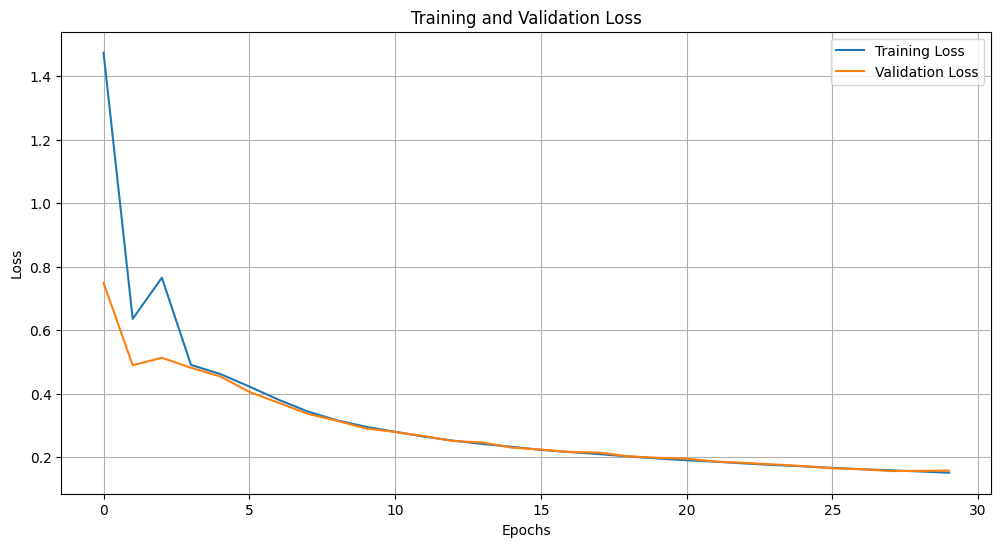

In [44]:
# Plot Training & Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

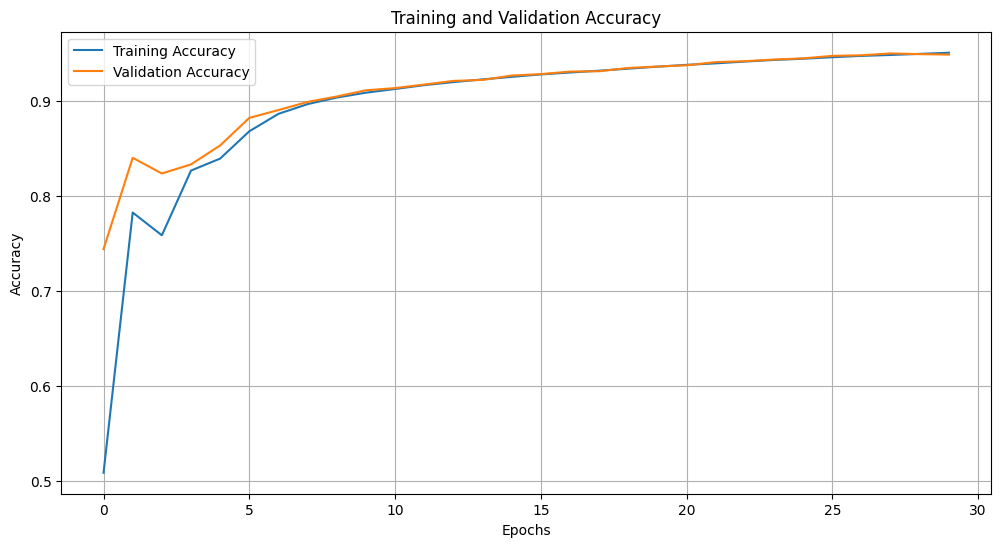

In [45]:
# Plot Training & Validation Accuracy
plt.figure(figsize=(12, 6))
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Let's show some Predictions

In [46]:
def display_predictions(model, dataset, num_samples=5, n_classes=13):
    # Take a few samples from the dataset
    for image, mask in dataset.take(num_samples):
        # Get the model's prediction
        prediction = model.predict(image)
        # Take the class with the highest probability for each pixel
        predicted_mask = np.argmax(prediction, axis=-1)
        
        # Reshape to remove single-dimensional entries from the shape
        predicted_mask = predicted_mask[0]
        
        # Plot input image, ground truth, and predicted mask
        plt.figure(figsize=(15, 5))
        
        # Display the input image
        plt.subplot(1, 3, 1)
        plt.imshow(image[0])
        plt.title('Input Image')
        
        # Display the true mask
        plt.subplot(1, 3, 2)
        plt.imshow(tf.squeeze(mask[0]), vmin=0, vmax=n_classes - 1)
        plt.title('True Mask')
        
        # Display the predicted mask
        plt.subplot(1, 3, 3)
        plt.imshow(predicted_mask, vmin=0, vmax=n_classes - 1)
        plt.title('Predicted Mask')

        # Show the plots
        plt.show()

2024-10-17 22:17:20.660279: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[32,32,192,256]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,64,192,256]{3,2,1,0}, f32[32,64,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-10-17 22:17:20.663939: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.003773402s
Trying algorithm eng0{} for conv (f32[32,32,192,256]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,64,192,256]{3,2,1,0}, f32[32,64,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","w

2/2 ━━━━━━━━━━━━━━━━━━━━ 22s 120ms/step


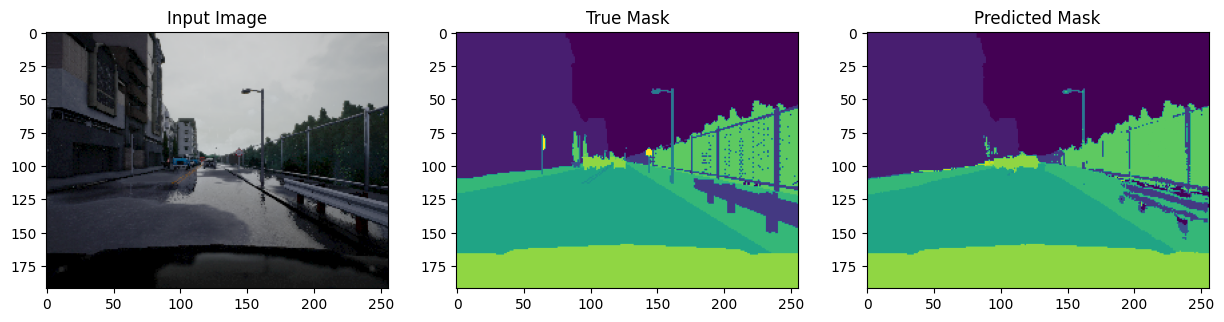

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


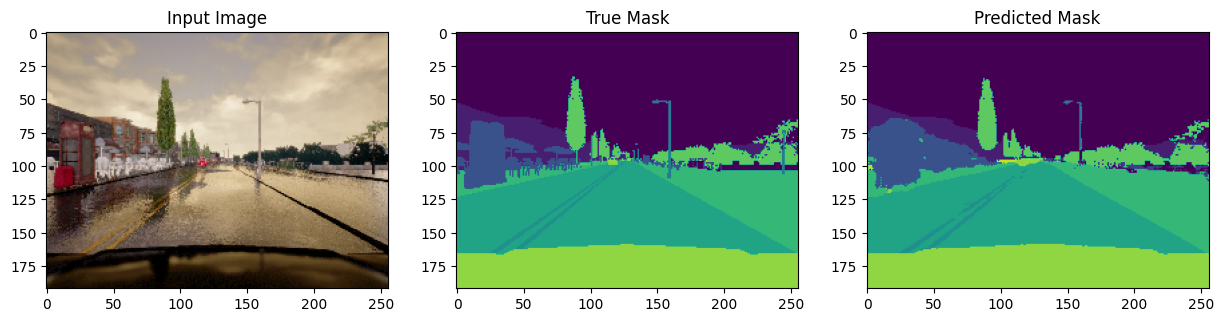

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


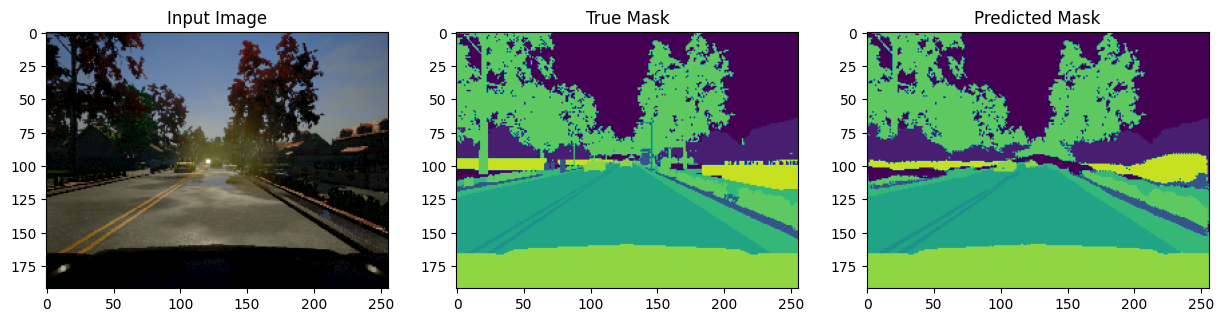

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


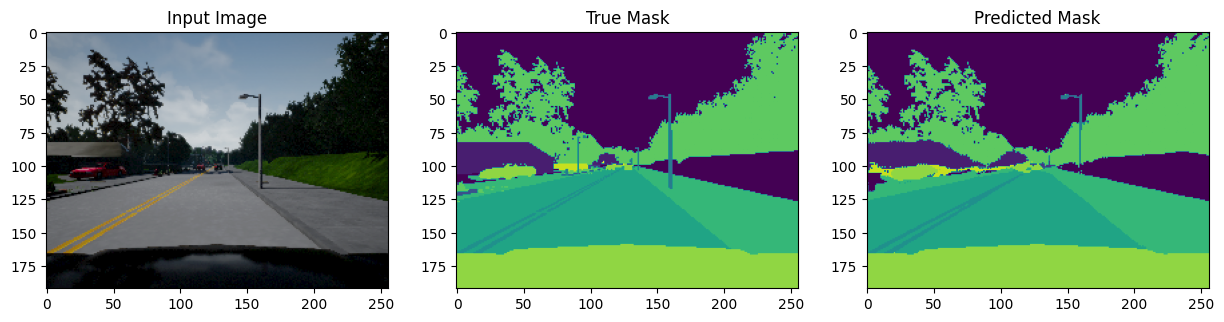

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


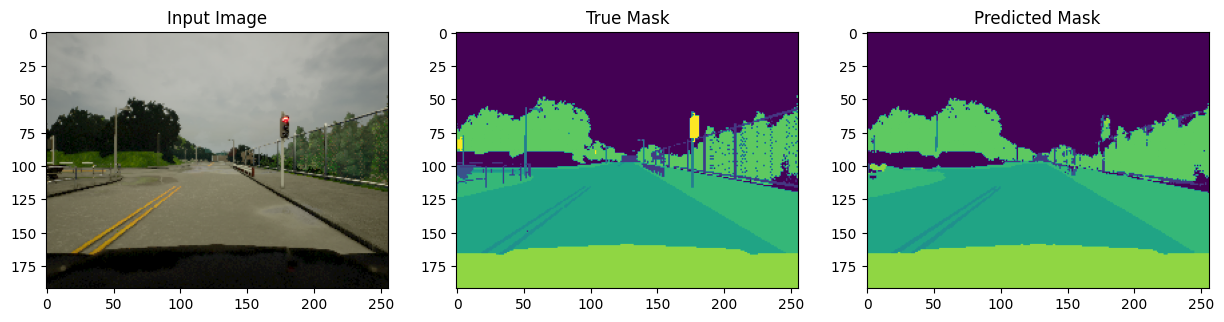

In [47]:
# Call the function to display predictions from the validation dataset
display_predictions(unet, val_dataset, num_samples=5, n_classes=13)

# Saving the Model

In [48]:
tf.keras.models.save_model(unet, '/kaggle/working/UNET_MODEL_1.h5')

## I Trained U_Net_2 model and U_Net_3 model in other notebooks take a look at them in my profile
## Thanks